In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler

In [2]:
start = '2015-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.915257
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.678247
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.983025
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.985281
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.321609


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835602
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139938


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.915257
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.678247
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.983025
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.985281
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.321609


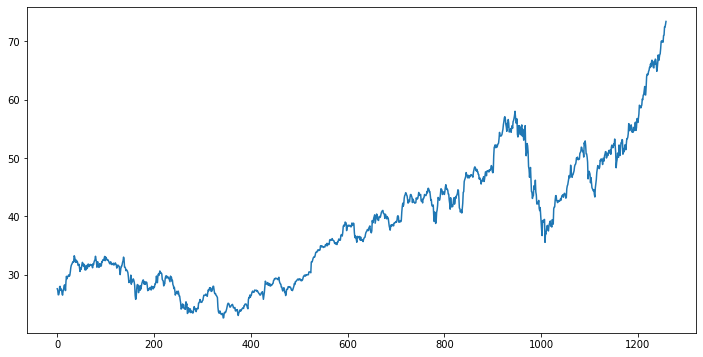

In [5]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)

In [6]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.915257
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.678247
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.983025
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.985281
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.321609
...,...,...,...,...,...,...,...
1254,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835602
1255,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
1256,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
1257,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676


In [7]:
df.shape

(1259, 7)

In [8]:
# spliting Data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.65)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.65):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(818, 1)
(441, 1)


In [9]:
data_training.head()

,Close
0,27.594999
1,27.332500
2,26.562500
3,26.565001
4,26.937500


In [10]:
data_testing.head()

,Close
818,42.097500
819,42.902500
820,43.200001
821,42.095001
822,42.512501


In [11]:
#scaling the input
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(818, 1)

In [13]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train.shape

(718, 100, 1)

In [15]:
# LSTM

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
# model.compile(optimizer= 'adam', loss = 'mean_squared_error')
# model.fit(x_train,y_train epochs=50)

In [21]:
# model.save('AAPL.h5')
from keras.models import load_model
model = load_model('AAPL.h5')

In [22]:
data_testing.head(100)

,Close
818,42.097500
819,42.902500
820,43.200001
821,42.095001
822,42.512501
...,...
913,53.330002
914,54.395000
915,53.865002
916,53.759998


In [23]:
data_training.tail(100)

,Close
718,43.562500
719,43.702499
720,44.060001
721,43.970001
722,43.667500
...,...
813,43.192501
814,42.084999
815,41.619999
816,41.945000


In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = pd.concat([past_100_days, data_testing])

In [26]:
final_df = final_df.reset_index(drop = True)
final_df

,Close
0,43.562500
1,43.702499
2,44.060001
3,43.970001
4,43.667500
...,...
536,71.067497
537,72.477501
538,72.449997
539,72.879997


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.21167304],
       [0.21537037],
       [0.22481186],
       [0.22243499],
       [0.21444604],
       [0.20982438],
       [0.19246003],
       [0.17753863],
       [0.19087551],
       [0.18460315],
       [0.18348075],
       [0.20434437],
       [0.2163608 ],
       [0.21642678],
       [0.21061664],
       [0.20388226],
       [0.18017955],
       [0.19582732],
       [0.19054537],
       [0.18229237],
       [0.18123596],
       [0.17707641],
       [0.17912324],
       [0.17945328],
       [0.20124123],
       [0.1948369 ],
       [0.19860031],
       [0.19827017],
       [0.20982438],
       [0.22600025],
       [0.2135877 ],
       [0.21233333],
       [0.21669084],
       [0.21669084],
       [0.18737625],
       [0.18757431],
       [0.19074344],
       [0.17852895],
       [0.19853423],
       [0.19833616],
       [0.2036181 ],
       [0.21662485],
       [0.21233333],
       [0.21220125],
       [0.2119371 ],
       [0.21847351],
       [0.23042385],
       [0.224

In [28]:
input_data.shape

(541, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [30]:
print(x_test.shape)
print(y_test.shape)

(441, 100, 1)
(441,)


model.evaluate(x_test,y_test)

In [31]:
# Model Prediction

y_predict = model.predict(x_test)

14/14 [==============================] - 3s 42ms/step


In [32]:
y_predict.shape

(441, 1)

In [33]:
y_test

array([0.17298296, 0.1942427 , 0.20209958, 0.17291697, 0.18394297,
       0.20507064, 0.19972271, 0.21094678, 0.21484217, 0.22203887,
       0.23801667, 0.23537565, 0.20209958, 0.15535455, 0.15218542,
       0.13699988, 0.14168753, 0.14545094, 0.13290642, 0.1523174 ,
       0.17767071, 0.22699067, 0.22910339, 0.27492408, 0.28370529,
       0.28958143, 0.29823056, 0.31592495, 0.30635149, 0.30344642,
       0.29215636, 0.30364448, 0.2957877 , 0.29129802, 0.30001324,
       0.2969101 , 0.30483296, 0.30344642, 0.3062855 , 0.30179581,
       0.29915489, 0.29499535, 0.31724552, 0.32774331, 0.33751484,
       0.34193844, 0.33850526, 0.32688497, 0.32378183, 0.33071437,
       0.32028256, 0.32094285, 0.30800209, 0.30734191, 0.28720456,
       0.29255249, 0.28568603, 0.28212068, 0.26396407, 0.27888547,
       0.27710289, 0.28595009, 0.28337515, 0.29704208, 0.27551828,
       0.28528981, 0.30225803, 0.31949031, 0.31797178, 0.30166384,
       0.32246137, 0.32444211, 0.32166911, 0.32523437, 0.31830

In [34]:
y_predict

array([[0.1621544 ],
       [0.16300115],
       [0.16869   ],
       [0.17877722],
       [0.18484998],
       [0.18702129],
       [0.1900483 ],
       [0.19337165],
       [0.198118  ],
       [0.20387426],
       [0.21042496],
       [0.21918449],
       [0.22757101],
       [0.22716513],
       [0.21066731],
       [0.18556994],
       [0.15937644],
       [0.13982934],
       [0.129873  ],
       [0.12598088],
       [0.1287063 ],
       [0.13947275],
       [0.16241887],
       [0.1916182 ],
       [0.22683221],
       [0.26151198],
       [0.2884452 ],
       [0.30440864],
       [0.31256098],
       [0.3124547 ],
       [0.306339  ],
       [0.29596487],
       [0.28848857],
       [0.28440237],
       [0.2825104 ],
       [0.28416786],
       [0.287301  ],
       [0.29200214],
       [0.29632178],
       [0.29961145],
       [0.3003169 ],
       [0.2982916 ],
       [0.29405004],
       [0.29441348],
       [0.30115807],
       [0.31268823],
       [0.32504994],
       [0.333

In [35]:
scaler.scale_

array([0.02640961])

In [36]:
y_predict = scaler.inverse_transform(y_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_test

array([[42.09749985],
       [42.90250015],
       [43.20000076],
       [42.09500122],
       [42.51250076],
       [43.3125    ],
       [43.11000061],
       [43.53499985],
       [43.68249893],
       [43.95500183],
       [44.56000137],
       [44.45999908],
       [43.20000076],
       [41.43000031],
       [41.31000137],
       [40.73500061],
       [40.91249847],
       [41.05500031],
       [40.58000183],
       [41.31499863],
       [42.27500153],
       [44.14250183],
       [44.22249985],
       [45.95750046],
       [46.29000092],
       [46.51250076],
       [46.84000015],
       [47.50999832],
       [47.14749908],
       [47.03749847],
       [46.61000061],
       [47.04499817],
       [46.74750137],
       [46.57749939],
       [46.90750122],
       [46.79000092],
       [47.09000015],
       [47.03749847],
       [47.14500046],
       [46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48

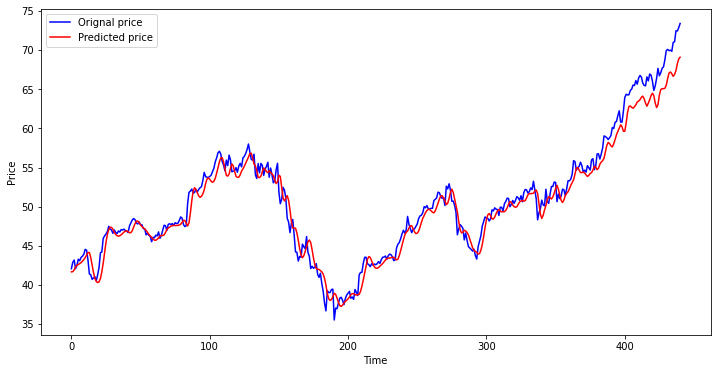

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Orignal price')
plt.plot(y_predict, 'r', label ='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
past_100 = data_testing.tail(100)

In [39]:
predict_df = past_100.reset_index(drop = True)
predict_df.tail()

,Close
95,71.067497
96,72.477501
97,72.449997
98,72.879997
99,73.412498


In [40]:
x_input = scaler.fit_transform(predict_df)
x_input = x_input.reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
temp_input = x_input

In [44]:
temp_input=temp_input[0].tolist()
temp_input

[0.005473969900699149,
 0.0,
 0.09112381303012507,
 0.02436411202181965,
 0.013523771497131687,
 0.06461312000398278,
 0.10593550037512323,
 0.10604277210456825,
 0.13051415585583248,
 0.12858228208403233,
 0.02318346790339776,
 0.0645058482745382,
 0.03949777832878487,
 0.05420203017070602,
 0.09155306372153627,
 0.08865525306383626,
 0.05602663221306159,
 0.0934851012669693,
 0.13738331333384313,
 0.1371686061013211,
 0.14693573801066462,
 0.1740903889607397,
 0.24804122640902238,
 0.24267469201140068,
 0.19609321274571556,
 0.20843617635079248,
 0.21702266414171367,
 0.23924019515921158,
 0.21981336684360198,
 0.18514543671795014,
 0.19577123378374894,
 0.18460875052346148,
 0.22056459649698024,
 0.2083289046213479,
 0.19684460617272626,
 0.25211984495877715,
 0.25877429520426576,
 0.1983472292531152,
 0.21831074376321347,
 0.28474830203591894,
 0.2852849882304076,
 0.25673498592938815,
 0.284963009268441,
 0.3178061735781048,
 0.38349266597106535,
 0.37984329811272177,
 0.373940241

In [45]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.88819456]
101
1 day input [0.         0.09112381 0.02436411 0.01352377 0.06461312 0.1059355
 0.10604277 0.13051416 0.12858228 0.02318347 0.06450585 0.03949778
 0.05420203 0.09155306 0.08865525 0.05602663 0.0934851  0.13738331
 0.13716861 0.14693574 0.17409039 0.24804123 0.24267469 0.19609321
 0.20843618 0.21702266 0.2392402  0.21981337 0.18514544 0.19577123
 0.18460875 0.2205646  0.2083289  0.19684461 0.25211984 0.2587743
 0.19834723 0.21831074 0.2847483  0.28528499 0.25673499 0.28496301
 0.31780617 0.38349267 0.3798433  0.37394024 0.36374369 0.37351083
 0.38563925 0.42964473 0.42374167 0.458302   0.46259533 0.49479454
 0.52130523 0.45948265 0.45916067 0.51819255 0.59396815 0.61199963
 0.60802845 0.60920893 0.63271437 0.64033509 0.66244518 0.65986902
 0.68680913 0.66716776 0.70065488 0.71503715 0.70634339 0.67307082
 0.66040587 0.65793715 0.7072019  0.68487726 0.72297952 0.71664705
 0.68348191 0.63292924 0.65750774 0.69872268 0.75378338 0.71310528
 0.72984884 0.75442733 0.76183318 0

8 day output [[0.5519182]]
9 day input [0.12858228 0.02318347 0.06450585 0.03949778 0.05420203 0.09155306
 0.08865525 0.05602663 0.0934851  0.13738331 0.13716861 0.14693574
 0.17409039 0.24804123 0.24267469 0.19609321 0.20843618 0.21702266
 0.2392402  0.21981337 0.18514544 0.19577123 0.18460875 0.2205646
 0.2083289  0.19684461 0.25211984 0.2587743  0.19834723 0.21831074
 0.2847483  0.28528499 0.25673499 0.28496301 0.31780617 0.38349267
 0.3798433  0.37394024 0.36374369 0.37351083 0.38563925 0.42964473
 0.42374167 0.458302   0.46259533 0.49479454 0.52130523 0.45948265
 0.45916067 0.51819255 0.59396815 0.61199963 0.60802845 0.60920893
 0.63271437 0.64033509 0.66244518 0.65986902 0.68680913 0.66716776
 0.70065488 0.71503715 0.70634339 0.67307082 0.66040587 0.65793715
 0.7072019  0.68487726 0.72297952 0.71664705 0.68348191 0.63292924
 0.65750774 0.69872268 0.75378338 0.71310528 0.72984884 0.75442733
 0.76183318 0.80143823 0.85199089 0.85789427 0.85070297 0.85370822
 0.84748318 0.89642595 0

18 day output [[0.5600394]]
19 day input [0.13716861 0.14693574 0.17409039 0.24804123 0.24267469 0.19609321
 0.20843618 0.21702266 0.2392402  0.21981337 0.18514544 0.19577123
 0.18460875 0.2205646  0.2083289  0.19684461 0.25211984 0.2587743
 0.19834723 0.21831074 0.2847483  0.28528499 0.25673499 0.28496301
 0.31780617 0.38349267 0.3798433  0.37394024 0.36374369 0.37351083
 0.38563925 0.42964473 0.42374167 0.458302   0.46259533 0.49479454
 0.52130523 0.45948265 0.45916067 0.51819255 0.59396815 0.61199963
 0.60802845 0.60920893 0.63271437 0.64033509 0.66244518 0.65986902
 0.68680913 0.66716776 0.70065488 0.71503715 0.70634339 0.67307082
 0.66040587 0.65793715 0.7072019  0.68487726 0.72297952 0.71664705
 0.68348191 0.63292924 0.65750774 0.69872268 0.75378338 0.71310528
 0.72984884 0.75442733 0.76183318 0.80143823 0.85199089 0.85789427
 0.85070297 0.85370822 0.84748318 0.89642595 0.89932376 0.95985843
 0.95867762 0.97713851 1.         0.88819456 0.84317189 0.7734428
 0.70344847 0.64544201 

27 day output [[0.5722611]]
28 day input [0.21981337 0.18514544 0.19577123 0.18460875 0.2205646  0.2083289
 0.19684461 0.25211984 0.2587743  0.19834723 0.21831074 0.2847483
 0.28528499 0.25673499 0.28496301 0.31780617 0.38349267 0.3798433
 0.37394024 0.36374369 0.37351083 0.38563925 0.42964473 0.42374167
 0.458302   0.46259533 0.49479454 0.52130523 0.45948265 0.45916067
 0.51819255 0.59396815 0.61199963 0.60802845 0.60920893 0.63271437
 0.64033509 0.66244518 0.65986902 0.68680913 0.66716776 0.70065488
 0.71503715 0.70634339 0.67307082 0.66040587 0.65793715 0.7072019
 0.68487726 0.72297952 0.71664705 0.68348191 0.63292924 0.65750774
 0.69872268 0.75378338 0.71310528 0.72984884 0.75442733 0.76183318
 0.80143823 0.85199089 0.85789427 0.85070297 0.85370822 0.84748318
 0.89642595 0.89932376 0.95985843 0.95867762 0.97713851 1.
 0.88819456 0.84317189 0.7734428  0.70344847 0.64544201 0.60318196
 0.57567406 0.55976355 0.55191821 0.54915529 0.54927683 0.55077839
 0.55269742 0.55448788 0.55592322

In [46]:
predicted = scaler.inverse_transform(lst_output)
predicted.shape

(30, 1)

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
df1=df.Close.tolist()
len(df1)

1259

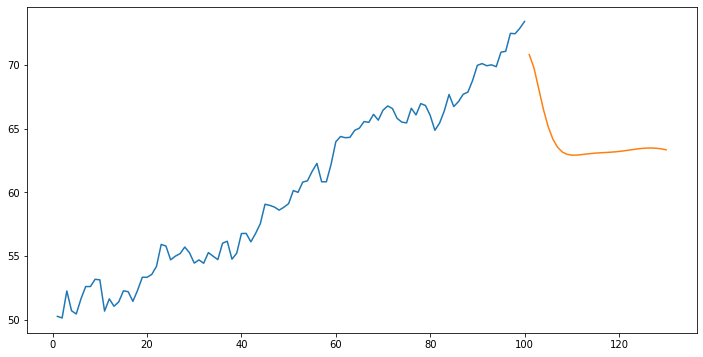

In [49]:
plt.figure(figsize = (12,6))
plt.plot(day_new, df1[len(df1)-100:])
plt.plot(day_pred, predicted)